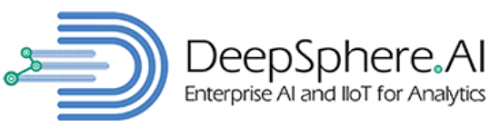

                                                © DeepSphere.AI, Inc. | Confidential and Proprietary

# ***Regression Model Implemention***#

#****Predicting the Spending Power of the Customers ****#

Predicting spending power of customers.Predicting spending power of customers can help the business increase customer satisfaction and sales, resulting in higher conversion rates

# **Business Challenges**

Predicting of Customers Spending Power has below challenges:  
1. Customers having transacted only once some have visited hundreds of times its difficult to hence its track customers behaviour.

2.Combining data from different sources is not be that easy.

3.Customers need to be engaged constanly via feedback channels and others.

# **Model Implementation**

In [1]:
print("Welcome To DeepSphere.AI's Applied AI Workshop")

Welcome To DeepSphere.AI's Applied AI Workshop


In [2]:
# Step-1: Mount Data Files into Colab Notebook
from google.colab import drive  
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
# Step-2: Importing all the Required Libraries

import pandas as vAR_pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [28]:
# Step-3: Import the Training Data
vAR_Training_Data = vAR_pd.read_csv('/content/drive/MyDrive/Customer Spending Power/Training Data/Training Data.csv')
vAR_Training_Data.drop(['CustomerID'],axis=1,inplace=True)

In [31]:
# Step-4: Select the Features 
vAR_Train_Features =  vAR_Training_Data[['Gender','Age','Annual Income (k$)','Products Purchased','Amount Spent']] 
vAR_le = LabelEncoder()
vAR_Gender_Conversion = vAR_le.fit_transform(vAR_Train_Features.iloc[:,0])
vAR_Gender_Conversion_df = vAR_pd.DataFrame(vAR_Gender_Conversion,columns={'Gender_Converted'})
vAR_Train_Features = vAR_Train_Features.merge(vAR_Gender_Conversion_df,left_index=True, right_index=True)
vAR_Train_Features = vAR_Train_Features[['Age','Gender_Converted','Annual Income (k$)','Products Purchased','Amount Spent']]
vAR_Train_Label = vAR_Training_Data[['Spending Power']]


In [32]:
#Step-5: Import the KMeans Model
vAR_Model = LinearRegression() 

In [42]:
# Step-6: Train the KMeans  Model
vAR_Model_Training = vAR_Model.fit(vAR_Train_Features,vAR_Train_Label) 
vAR_Predicted = vAR_Model.predict(vAR_Train_Features).astype(int)
vAR_Predicted = vAR_pd.DataFrame(vAR_Predicted,columns=['Customer Spending Power'])
vAR_Actual = vAR_Training_Data[['Spending Power']]

In [43]:
vAR_Test_Data = vAR_pd.read_csv('/content/drive/MyDrive/Customer Spending Power/Test Data/Test Data.csv')
vAR_Test_Data.drop(['CustomerID'],axis=1,inplace=True)
vAR_Test_Features =  vAR_Test_Data[['Gender','Age','Annual Income (k$)','Products Purchased','Amount Spent']] 
vAR_Gender_Conversion = vAR_le.fit_transform(vAR_Test_Data.iloc[:,0])
vAR_Gender_Conversion_df = vAR_pd.DataFrame(vAR_Gender_Conversion,columns={'Gender_Converted'})
vAR_Test_Features = vAR_Test_Features.merge(vAR_Gender_Conversion_df,left_index=True, right_index=True)
vAR_Test_Features = vAR_Test_Features[['Age','Gender_Converted','Annual Income (k$)','Products Purchased','Amount Spent']]


In [44]:
# Step-8: Test the Model
vAR_Model_Testing = vAR_Model.predict(vAR_Test_Features).astype(int) 

In [45]:
# Step-9: Write the Model Outcome to a file 
vAR_Model_Testing_df = vAR_pd.DataFrame(vAR_Model_Testing)  
vAR_Model_Testing_df.head()
vAR_Model_Output= vAR_Training_Data.iloc[:,0:6]
vAR_Test_Data ['Predicted Customer Spending Power'] = vAR_Model_Testing_df
vAR_Test_Data.to_excel('/content/drive/MyDrive/Customer Spending Power/Model Output/Model_Output_Customer Spending Power.xlsx',index=False)
vAR_Model_output = vAR_pd.read_excel('/content/drive/MyDrive/Customer Spending Power/Model Output/Model_Output_Customer Spending Power.xlsx')


In [46]:
# Step-10: Get the Accuracy Score of the Model

vAR_Accuracy_Score = accuracy_score(vAR_Actual,vAR_Predicted)
print("The Accuracy of the Model is:",vAR_Accuracy_Score)

The Accuracy of the Model is: 0.02
